# Forecast predictions in offshore and coastal points
# all over the world

### please contact jtausiahoyal@gmail.com for more information

With this jupyter notebook, forecasts of the waves can be done all over the world just running all the cells below. Data is downloaded from the [NOAA](https://www.noaa.gov/) website and used for the local predictions. In case the methodology followed wanna be studied in detail, refer to the Forecast class in the repository, and to all the available notebooks as they explain step by step the procedure.

But briefly explained, this notebook download the data, save and plot it and then, reconstruct the predictions using RBF in coastal points using the previously propagated cases with SWAN (refer to the notebooks and the paper in the repo for more information).

In [1]:
# basic imports
import sys
import os
import os.path as op
import datetime

# dev library
sys.path.insert(0, op.join(os.path.abspath('')))

# Forecast module
from forecast import Forecast

Pulling the data from: 

https://nomads.ncep.noaa.gov:9090/dods/wave/mww3/20200803/multi_1.glo_30mext20200803_00z


The times with forecast go from 2020-08-04 00:00:00 to 2020-08-11 12:00:00 

Generating images and GIF in "path"... 

Plotting time: 2020-08-04 00:00:00...
Plotting time: 2020-08-05 00:00:00...
Plotting time: 2020-08-06 00:00:00...
Plotting time: 2020-08-07 00:00:00...
Plotting time: 2020-08-08 00:00:00...
Plotting time: 2020-08-09 00:00:00...
Plotting time: 2020-08-10 00:00:00...
Plotting time: 2020-08-11 00:00:00...

 GIF generated and saved!! 



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    title: Multi-grid wave model: Global 30 arc-min grid from 00Z03aug2020 downloaded Aug 03 04:24 UTC
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Mon Aug 03 04:36:46 UTC 2020 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(336), lon(720), time(61)
    variables(dimensions): float64 time(time), float64

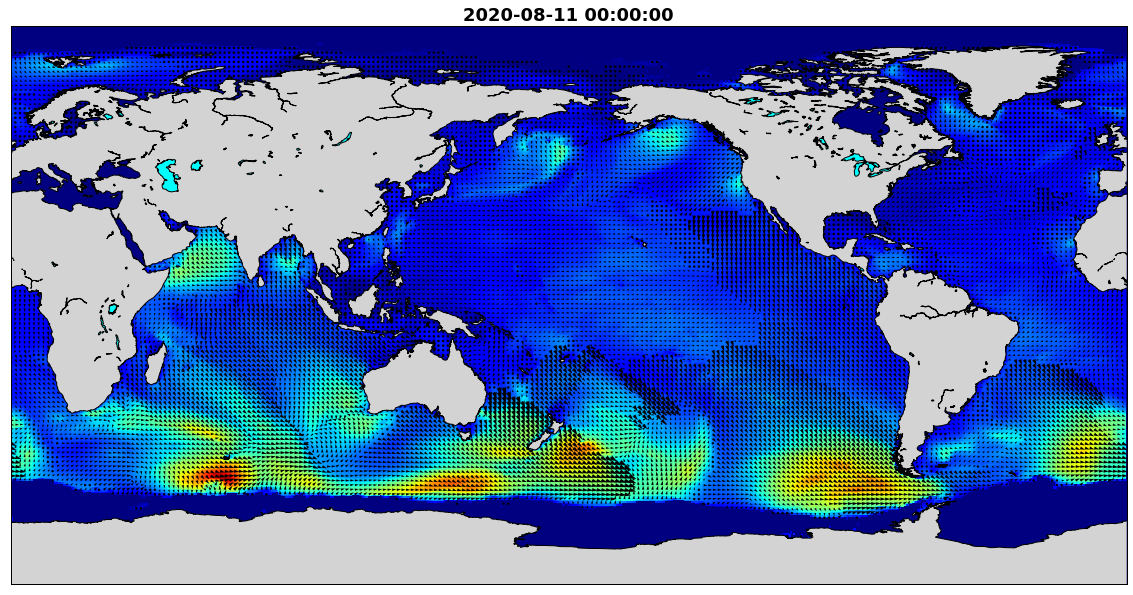

In [2]:
date         = datetime.date.today() # today or ex: '20200707'
date         = date.strftime("%Y%m%d")
images_path  = op.join(os.getcwd(), '..', 'images', 'forecast') # save images and GIF
location     = (0, 0) # location to see the forecast

forecast = Forecast(date=date, 
                    images_path=images_path, 
                    location=location)

print(forecast.forecast)

In [3]:
new_location = forecast.select_precise_location()

Move the marker to the exact position: 



Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [4]:
forecast_nc, forecast_data = forecast.select_region(marker=new_location,
                                                    delta_lon=0.8, 
                                                    delta_lat=0.8,
                                                    zoom=8)

New location in [43.59377425464737, -4.014691435731948]!! 

These are the coordinates in the selected region: 

[43.  43.5 44. ]
[355.5 356.  356.5]




Map(center=[43.59377425464737, 355.98530856426805], controls=(ZoomControl(options=['position', 'zoom_in_text',…

Saving the data in the shown region... 

<xarray.Dataset>
Dimensions:    (lat: 3, lon: 3, time: 61)
Coordinates:
  * time       (time) datetime64[ns] 2020-08-04 ... 2020-08-11T12:00:00
  * lat        (lat) float64 43.0 43.5 44.0
  * lon        (lon) float64 355.5 356.0 356.5
Data variables:
    Hsea       (time, lat, lon) float32 9.999e+20 9.999e+20 ... 9.999e+20
    Tpsea      (time, lat, lon) float32 9.999e+20 9.999e+20 ... 9.999e+20
    Dirsea     (time, lat, lon) float32 9.999e+20 9.999e+20 ... 9.999e+20
    Hswell1    (time, lat, lon) float32 9.999e+20 9.999e+20 ... 0.96 0.91999996
    Tpswell1   (time, lat, lon) float32 9.999e+20 9.999e+20 ... 5.92 5.8599997
    Dirswell1  (time, lat, lon) float32 9.999e+20 9.999e+20 ... 5.65 2.24
    Hswell2    (time, lat, lon) float32 9.999e+20 9.999e+20 ... 0.69 0.69
    Tpswell2   (time, lat, lon) float32 9.999e+20 9.999e+20 ... 8.8 8.73
    Dirswell2  (time, lat, lon) float32 9.999e+20 9.999e+20 ... 296.46 296.09
    Hs         (time, lat, l

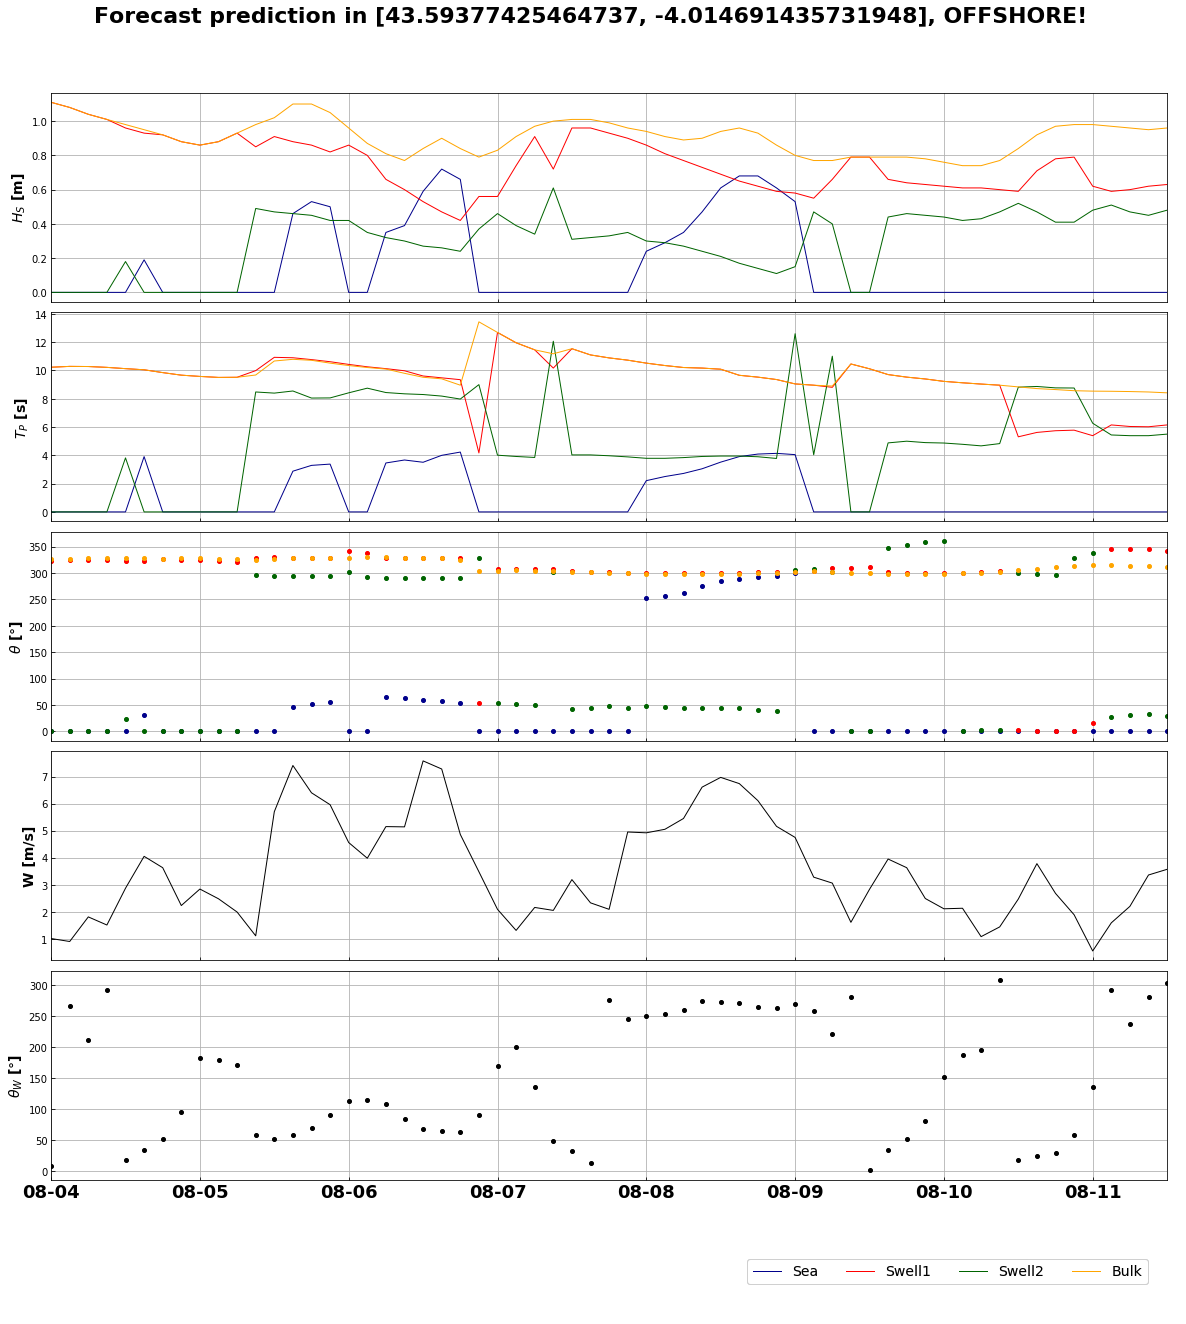

In [5]:
forecast.plot_results(forecast=forecast_data,
                      coast=False)

<div class="alert alert-block alert-info">
<b>Important:</b> In the case that NO propagations have been done using SWAN, then the reconstruction in coast cannot be performed, and the notebook ends here.
</div>

In [6]:
p_data_swan = op.join(os.getcwd(), '..', 'data', 'projects-swan')

# -------------- EDIT THIS PART --------------------------------------------- #
name = 'CAN'               # used name in the SWAN section
resolution = str(0.0042)   # used resolution in the SWAN section
num_cases = str(300)       # num cases run in SWAN
# --------------------------------------------------------------------------- #

# Example coordinates for the forecast reconstruction:
# Sardinero 43.5, -3.75
# Liencres 43.46, -3.97

forecast_recon = forecast.forecast_reconstruction(p_data_swan=p_data_swan, 
                                                  forecast_data=forecast_data, 
                                                  name=name, 
                                                  resolution=resolution, 
                                                  num_cases=num_cases)

SUBSETS: 

SEA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hs      300 non-null    float64
 1   per     300 non-null    float64
 2   dir     300 non-null    float64
dtypes: float64(3)
memory usage: 7.2 KB
None
SWELL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hs      300 non-null    float64
 1   per     300 non-null    float64
 2   dir     300 non-null    float64
dtypes: float64(3)
memory usage: 7.2 KB
None


Select the desired point to reconstruct as it is given in Google Maps: 

Latitude location to obtain the forecast reconstruction: 43.46
Longitude location to obtain the forecast reconstruction: 
-3.97


TARGETS: 

SEA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total

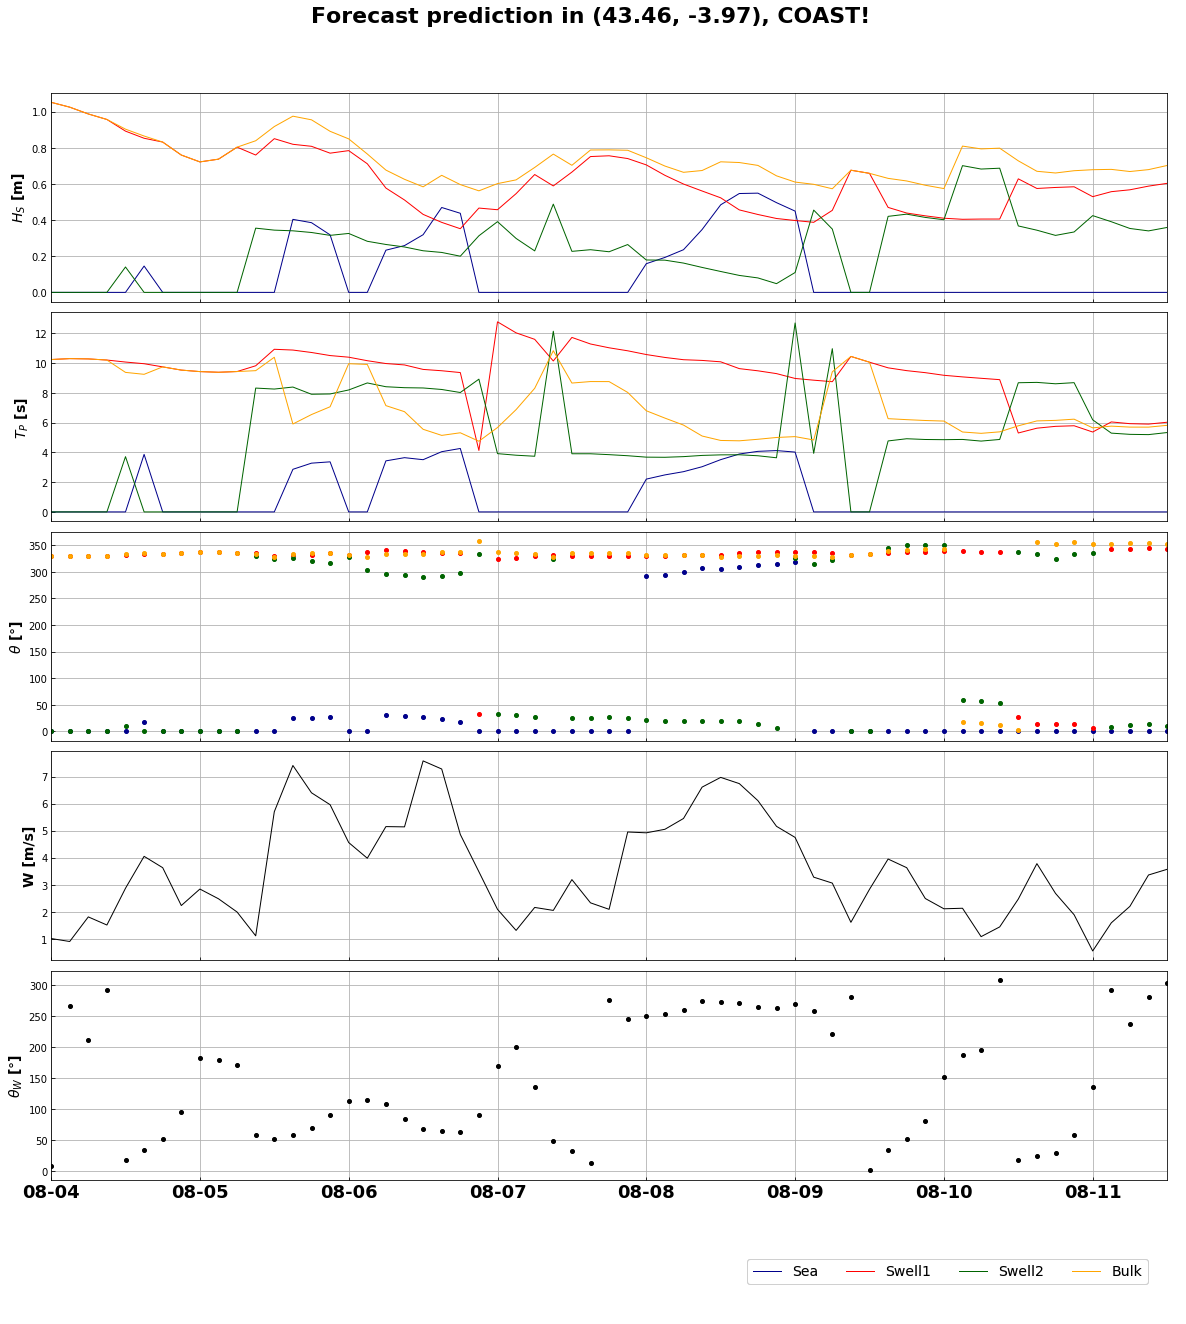

In [8]:
forecast.plot_results(forecast=forecast_recon,
                      coast=True)